# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene, norm, t, ttest_ind

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [5]:
data = pd.read_csv('Q1.csv')
data.head()

,Timestamp,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
0,3/10/2018 0:00,39.370909,38.637728,40.846605,39.782834,0.060756,0.066139,0.087974,0.097370,0
1,3/10/2018 0:00,39.390616,38.651286,40.884015,39.805669,0.070343,0.064768,0.094204,0.111891,0
2,3/10/2018 0:00,39.403041,38.659552,40.926061,39.817418,0.053073,0.053162,0.085925,0.088741,0
3,3/10/2018 0:00,39.420096,38.677405,40.966947,39.839593,0.059945,0.061724,0.088830,0.100587,0
4,3/10/2018 0:00,39.430529,38.678065,41.008001,39.849687,0.072104,0.060607,0.089137,0.106438,0


In [6]:
data.describe()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s),Fault
count,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000,13847.000000
mean,38.894831,38.372753,37.049863,37.083295,0.998612,1.345662,0.934057,1.763645,0.393082
std,1.657766,1.818556,2.927990,3.476318,0.616521,0.853053,0.619965,1.268073,0.488452
min,34.272883,33.652465,31.602933,31.247236,0.046510,0.045864,0.068607,0.082864,0.000000
25%,38.336334,37.233618,35.394773,34.523069,0.070277,0.067707,0.091273,0.108074,0.000000
50%,39.569812,39.364623,38.227170,37.395959,1.322656,1.778066,0.935697,1.670248,0.000000
75%,39.970923,39.671286,39.413810,40.465354,1.473304,1.967611,1.525421,2.952789,1.000000
max,41.325293,40.638881,43.187444,41.962697,1.610700,2.390570,1.785126,3.950299,1.000000


# Checking data

In [7]:
print("the data shape is {}".format(data.shape))

the data shape is (13847, 10)


In [8]:
data.isnull().sum()

Timestamp           0
CHP1Temp1(Deg C)    0
CHP1Temp2(Deg C)    0
CHP2Temp1(Deg C)    0
CHP2Temp2(Deg C)    0
CHP1Vib1(mm/s)      0
CHP1Vib2(mm/s)      0
CHP2Vib1(mm/s)      0
CHP2Vib2(mm/s)      0
Fault               0
dtype: int64

<AxesSubplot:xlabel='Fault', ylabel='count'>

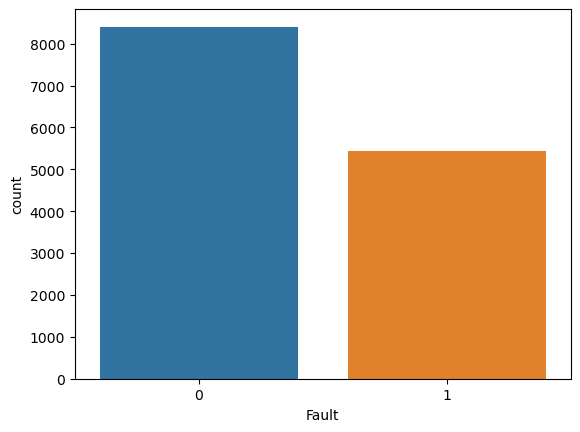

In [9]:
sns.countplot(data=data, x='Fault')

In [10]:
data['Fault'].value_counts()

0    8404
1    5443
Name: Fault, dtype: int64

In [11]:
data_numeric = data.select_dtypes('number')
data_numeric.drop('Fault', axis=1, inplace=True)

# EDA

# Univariate EDA on Numerical Features

In [12]:
def whisk(x):
  q1 = np.nanpercentile(x, 25)
  q3 = np.nanpercentile(x, 75)
  iqr = q3 - q1
  lower_fence = q1 - 1.5*iqr
  upper_fence = q3 + 1.5*iqr

  #identifikasi nonoutlier
  non_outlier = []
  for num in x:
    if num >= lower_fence and num <= upper_fence:
      non_outlier.append(num)
  lower_whisker = np.min(non_outlier)
  upper_whisker = np.max(non_outlier)
  
  #identifikasi outlier
  outlier = []
  for num in x:
    if num < lower_fence or num > upper_fence:
      outlier.append(num)
  
  print("========= Basic Stats ==========")
  print(f"Mean: {x.mean()}")
  print(f"Min: {np.min(x)}")
  print(f"Max: {np.max(x)}")
  print(f"Std: {x.std()}")
  print("====== Quantiles and IQR =======")
  print('q1: {}'.format(q1))
  print('q3: {}'.format(q3))
  print(f"IQR: {iqr}")
  print("============= Whisk ============")
  print('Lower Fence: {}'.format(lower_fence))
  print('Upper Fence: {}'.format(upper_fence))
  print(f"Lower whisker: {lower_whisker}")
  print(f"Upper whisker: {upper_whisker}")
  print()
  print(f"Jumlah outlier: {len(outlier)}")
  print(f"Outliers: {outlier}")
  print()
  print("Skew adalah: {}".format(skew(x)))
  print(f"Hasil dari skewtest adalah stats: {skewtest(x)[0]}, p-value:{skewtest(x)[1]}")

  if skewtest(x)[1] < 0.05:
    print('p-value dibawah 0.05, Data Skewed')
  else:
    print('p-value diatas Data tidak skewed, relatif simetris')

1. CHP1Temp1(Deg C)


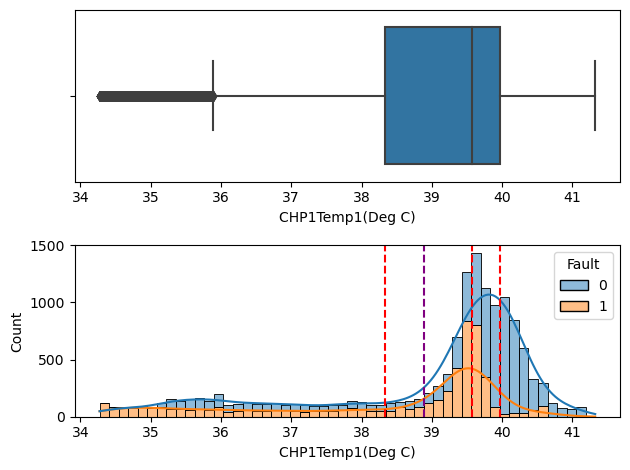

========= Basic Stats ==========
Mean: 38.894831127825455
Min: 34.272883
Max: 41.325293
Std: 1.6577662094867176
====== Quantiles and IQR =======
q1: 38.3363335
q3: 39.970923
IQR: 1.634589499999997
============= Whisk ============
Lower Fence: 35.88444925
Upper Fence: 42.42280724999999
Lower whisker: 35.884616
Upper whisker: 41.325293

Jumlah outlier: 1392
Outliers: [35.8818, 35.881305, 35.879813, 35.878157, 35.877166, 35.869876, 35.870703, 35.863253, 35.860438, 35.857291, 35.857123, 35.854144, 35.850005, 35.851493, 35.846362, 35.846362, 35.839404, 35.847518, 35.842551, 35.830626, 35.83311, 35.827147, 35.814231, 35.806945, 35.805785, 35.803798, 35.804461, 35.796511, 35.792369, 35.789225, 35.791709, 35.788562, 35.786574, 35.785414, 35.784423, 35.785746, 35.777961, 35.777633, 35.779288, 35.784255, 35.776969, 35.773822, 35.778624, 35.772662, 35.773822, 35.775477, 35.766536, 35.775973, 35.772002, 35.774318, 35.774817, 35.779948, 35.779452, 35.776969, 35.77912, 35.775973, 35.770674, 35.77283

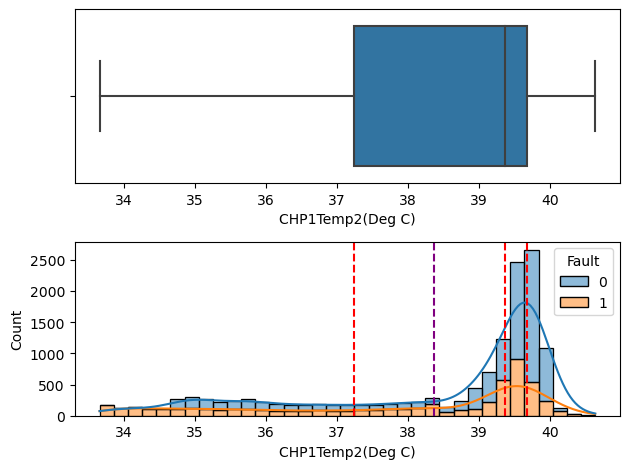

========= Basic Stats ==========
Mean: 38.372752753737345
Min: 33.652465
Max: 40.638881
Std: 1.8185562372601438
====== Quantiles and IQR =======
q1: 37.2336185
q3: 39.671286
IQR: 2.4376675000000034
============= Whisk ============
Lower Fence: 33.57711724999999
Upper Fence: 43.32778725000001
Lower whisker: 33.652465
Upper whisker: 40.638881

Jumlah outlier: 0
Outliers: []

Skew adalah: -1.1292716537783167
Hasil dari skewtest adalah stats: -44.283208119241706, p-value:0.0
p-value dibawah 0.05, Data Skewed
3. CHP2Temp1(Deg C)


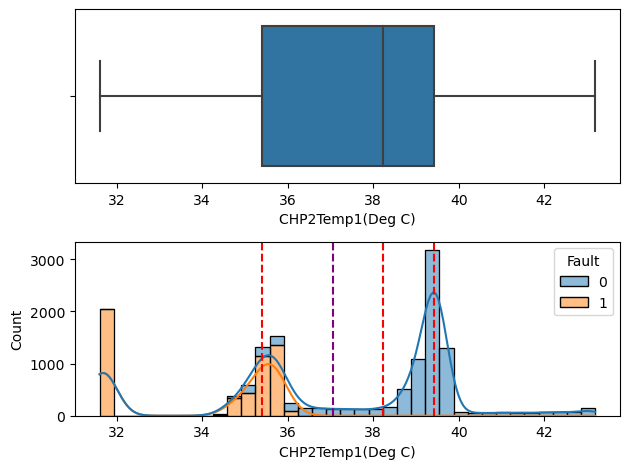

========= Basic Stats ==========
Mean: 37.049862726077805
Min: 31.602933
Max: 43.187444
Std: 2.9279901949745266
====== Quantiles and IQR =======
q1: 35.394773
q3: 39.41381
IQR: 4.019036999999997
============= Whisk ============
Lower Fence: 29.366217500000005
Upper Fence: 45.442365499999994
Lower whisker: 31.602933
Upper whisker: 43.187444

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.5079552614496141
Hasil dari skewtest adalah stats: -23.066406426069737, p-value:1.0068873993207945e-117
p-value dibawah 0.05, Data Skewed
4. CHP2Temp2(Deg C)


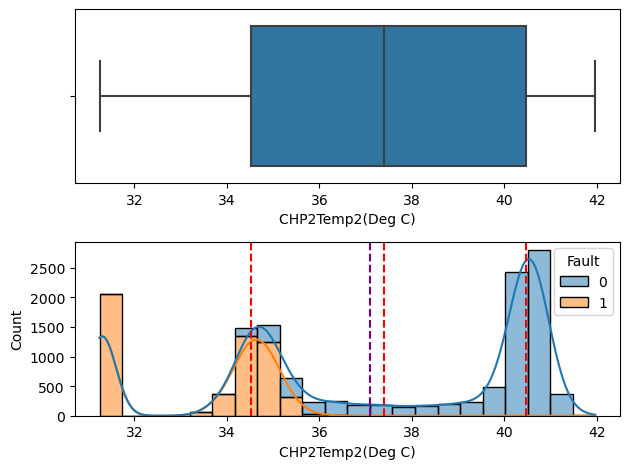

========= Basic Stats ==========
Mean: 37.08329472925557
Min: 31.247236
Max: 41.962697
Std: 3.4763179946843565
====== Quantiles and IQR =======
q1: 34.523069
q3: 40.465354
IQR: 5.942284999999998
============= Whisk ============
Lower Fence: 25.609641500000002
Upper Fence: 49.378781499999995
Lower whisker: 31.247236
Upper whisker: 41.962697

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.3461948297706954
Hasil dari skewtest adalah stats: -16.17876342880023, p-value:7.121027475087111e-59
p-value dibawah 0.05, Data Skewed
5. CHP1Vib1(mm/s)


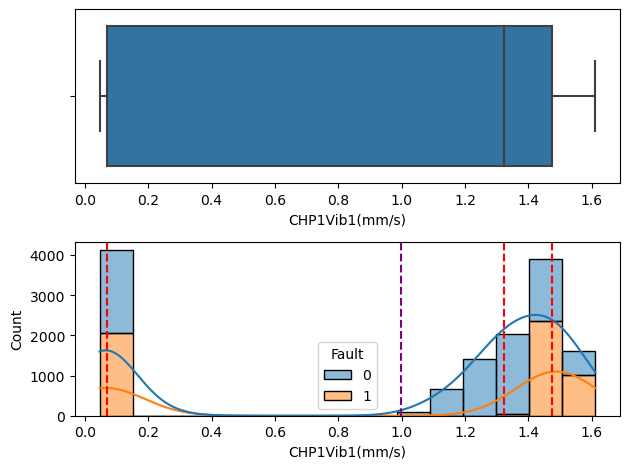

========= Basic Stats ==========
Mean: 0.9986118864736058
Min: 0.04651
Max: 1.6107
Std: 0.6165208288153831
====== Quantiles and IQR =======
q1: 0.07027749999999999
q3: 1.4733044999999998
IQR: 1.4030269999999998
============= Whisk ============
Lower Fence: -2.0342629999999997
Upper Fence: 3.5778449999999995
Lower whisker: 0.04651
Upper whisker: 1.6107

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.8012972157114334
Hasil dari skewtest adalah stats: -34.07641213476394, p-value:1.649422999598563e-254
p-value dibawah 0.05, Data Skewed
6. CHP1Vib2(mm/s)


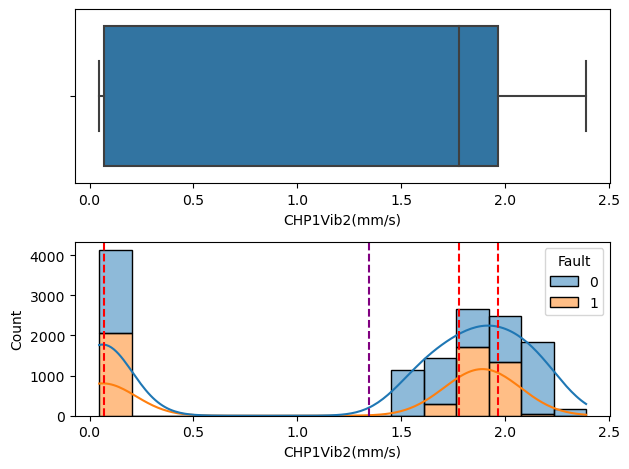

========= Basic Stats ==========
Mean: 1.3456619779013466
Min: 0.045864
Max: 2.39057
Std: 0.8530529620010346
====== Quantiles and IQR =======
q1: 0.067707
q3: 1.9676105000000002
IQR: 1.8999035000000002
============= Whisk ============
Lower Fence: -2.78214825
Upper Fence: 4.81746575
Lower whisker: 0.045864
Upper whisker: 2.39057

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.7584636937897313
Hasil dari skewtest adalah stats: -32.58698282825161, p-value:6.271138959328296e-233
p-value dibawah 0.05, Data Skewed
7. CHP2Vib1(mm/s)


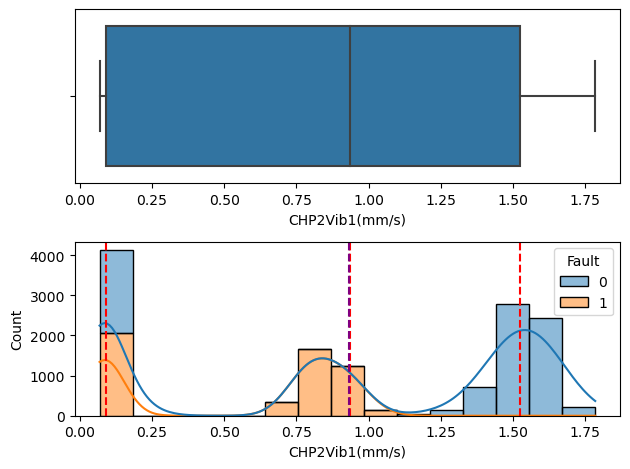

========= Basic Stats ==========
Mean: 0.9340574478948471
Min: 0.068607
Max: 1.785126
Std: 0.6199652583096374
====== Quantiles and IQR =======
q1: 0.091273
q3: 1.5254205
IQR: 1.4341475000000001
============= Whisk ============
Lower Fence: -2.05994825
Upper Fence: 3.6766417500000004
Lower whisker: 0.068607
Upper whisker: 1.785126

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.3274268745187924
Hasil dari skewtest adalah stats: -15.344741206337675, p-value:3.8408803462381497e-53
p-value dibawah 0.05, Data Skewed
8. CHP2Vib2(mm/s)


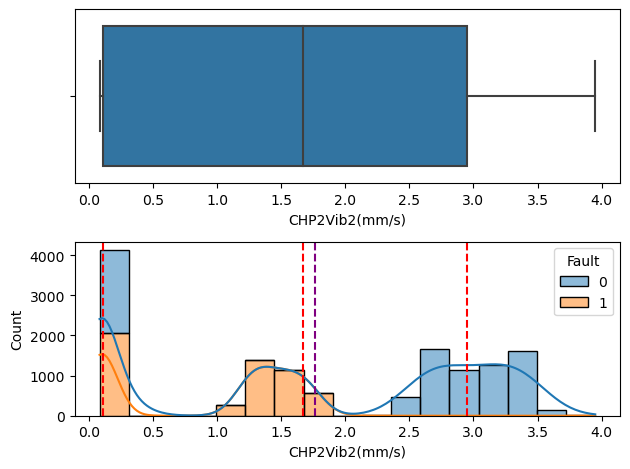

========= Basic Stats ==========
Mean: 1.7636448701523644
Min: 0.082864
Max: 3.950299
Std: 1.2680732969442847
====== Quantiles and IQR =======
q1: 0.10807449999999999
q3: 2.9527894999999997
IQR: 2.844715
============= Whisk ============
Lower Fence: -4.1589979999999995
Upper Fence: 7.219861999999999
Lower whisker: 0.082864
Upper whisker: 3.950299

Jumlah outlier: 0
Outliers: []

Skew adalah: -0.16377979803899384
Hasil dari skewtest adalah stats: -7.820448855860002, p-value:5.263531435521445e-15
p-value dibawah 0.05, Data Skewed


In [13]:
num = 1
for col in data_numeric.columns:
  print(f"{num}. {col}")
  fig, ax = plt.subplots(2,1)
  sns.boxplot(data=data, x=col, ax=ax[0])
  sns.histplot(data=data, x=col, ax=ax[1], kde=True, hue='Fault', multiple='stack')
  ax[1].axvline(np.percentile(data_numeric[col], 25), color='red', linestyle='--')
  ax[1].axvline(np.percentile(data_numeric[col], 50), color='red', linestyle='--')
  ax[1].axvline(np.percentile(data_numeric[col], 75), color='red', linestyle='--')
  ax[1].axvline(np.mean(data_numeric[col]), color='purple', linestyle='--')
  plt.tight_layout()
  plt.show()
  whisk(data_numeric[col])
  num += 1
  print(100*'=')

1. Fault - CHP1Temp1(Deg C)


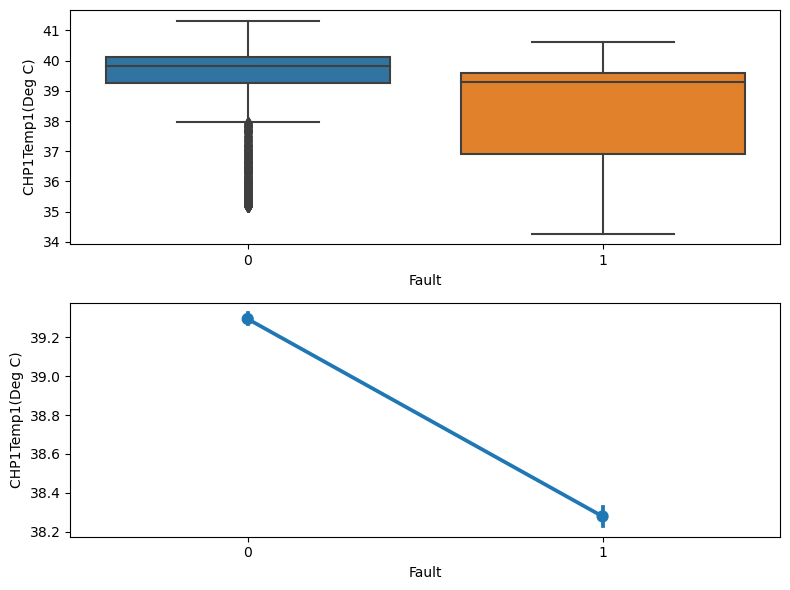


Confidence interval nilai CHP1Temp1(Deg C) untuk faulty pump adalah (38.231098437296005, 38.32718771041687)
Confidence interval nilai CHP1Temp1(Deg C) untuk non-faulty pump adalah (39.26330299955359, 39.3238818828832)
----------------------------------------------------------------------------------------------------

H0: Mean CHP1Temp1(Deg C) untuk faulty pump = Mean CHP1Temp1(Deg C) untuk non-faulty pump
H1: Mean CHP1Temp1(Deg C) untuk faulty pump != Mean CHP1Temp1(Deg C) untuk non-faulty
Nilai p-value: 9.785876907214743e-284, tolak H0


2. Fault - CHP1Temp2(Deg C)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


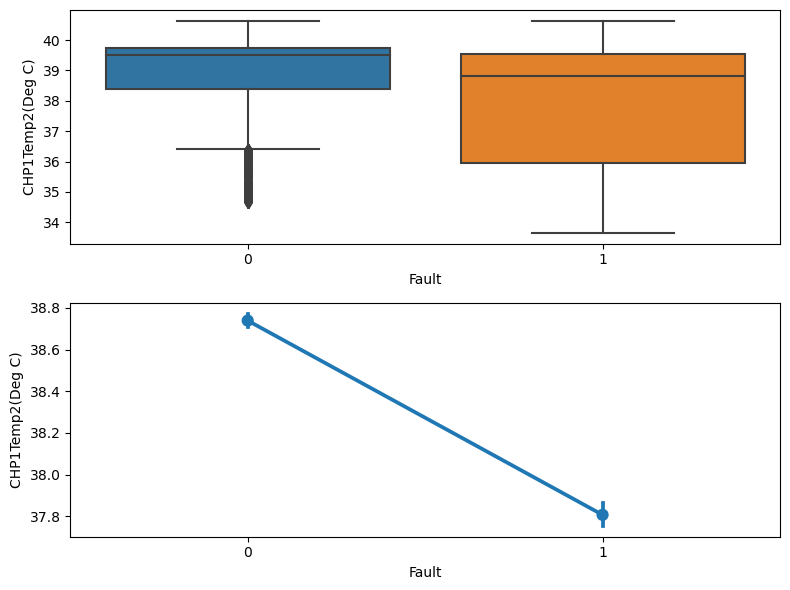


Confidence interval nilai CHP1Temp2(Deg C) untuk faulty pump adalah (37.75302096833353, 37.86246816670203)
Confidence interval nilai CHP1Temp2(Deg C) untuk non-faulty pump adalah (38.70582833301263, 38.77155236665445)
----------------------------------------------------------------------------------------------------

H0: Mean CHP1Temp2(Deg C) untuk faulty pump = Mean CHP1Temp2(Deg C) untuk non-faulty pump
H1: Mean CHP1Temp2(Deg C) untuk faulty pump != Mean CHP1Temp2(Deg C) untuk non-faulty
Nilai p-value: 2.1392730400896349e-196, tolak H0


3. Fault - CHP2Temp1(Deg C)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


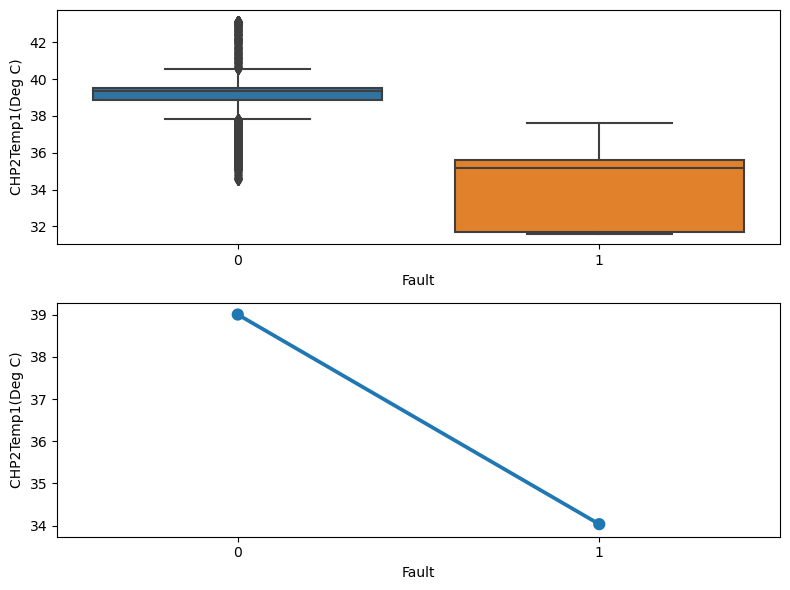


Confidence interval nilai CHP2Temp1(Deg C) untuk faulty pump adalah (33.982787449638955, 34.080708328057234)
Confidence interval nilai CHP2Temp1(Deg C) untuk non-faulty pump adalah (38.97284012149967, 39.03635678687765)
----------------------------------------------------------------------------------------------------

H0: Mean CHP2Temp1(Deg C) untuk faulty pump = Mean CHP2Temp1(Deg C) untuk non-faulty pump
H1: Mean CHP2Temp1(Deg C) untuk faulty pump != Mean CHP2Temp1(Deg C) untuk non-faulty
Nilai p-value: 0.0, tolak H0


4. Fault - CHP2Temp2(Deg C)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


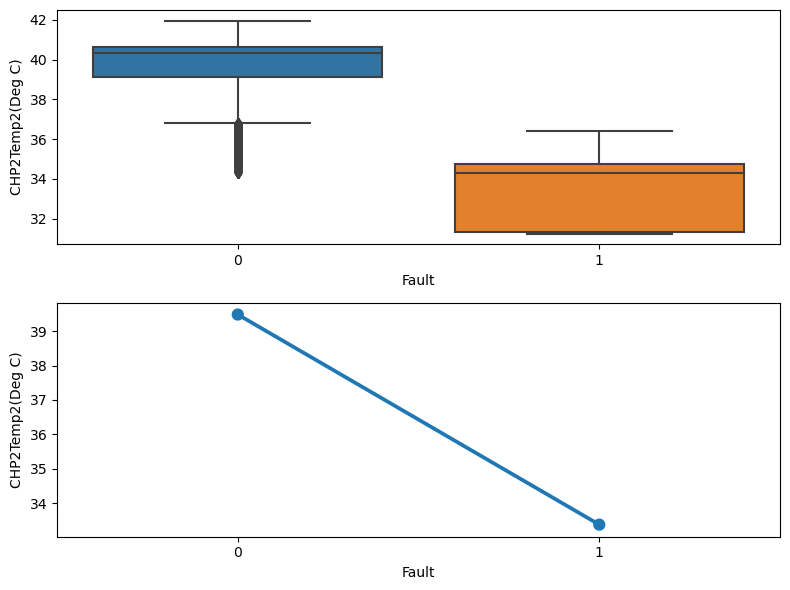


Confidence interval nilai CHP2Temp2(Deg C) untuk faulty pump adalah (33.33412587859807, 33.42155494668211)
Confidence interval nilai CHP2Temp2(Deg C) untuk non-faulty pump adalah (39.44316075773143, 39.52323542265885)
----------------------------------------------------------------------------------------------------

H0: Mean CHP2Temp2(Deg C) untuk faulty pump = Mean CHP2Temp2(Deg C) untuk non-faulty pump
H1: Mean CHP2Temp2(Deg C) untuk faulty pump != Mean CHP2Temp2(Deg C) untuk non-faulty
Nilai p-value: 0.0, tolak H0


5. Fault - CHP1Vib1(mm/s)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


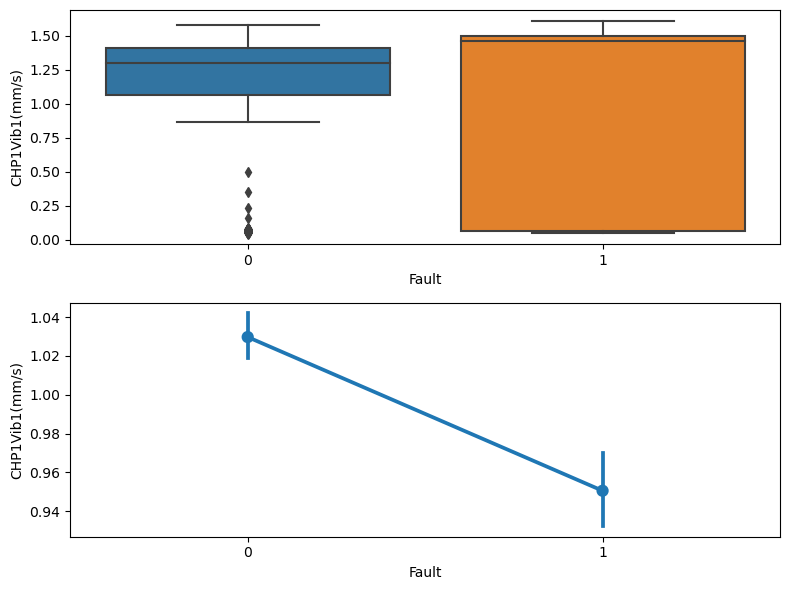


Confidence interval nilai CHP1Vib1(mm/s) untuk faulty pump adalah (0.932204801340981, 0.9688469278524771)
Confidence interval nilai CHP1Vib1(mm/s) untuk non-faulty pump adalah (1.017736198752918, 1.041775108005764)
----------------------------------------------------------------------------------------------------

H0: Mean CHP1Vib1(mm/s) untuk faulty pump = Mean CHP1Vib1(mm/s) untuk non-faulty pump
H1: Mean CHP1Vib1(mm/s) untuk faulty pump != Mean CHP1Vib1(mm/s) untuk non-faulty
Nilai p-value: 1.433802755712032e-13, tolak H0


6. Fault - CHP1Vib2(mm/s)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


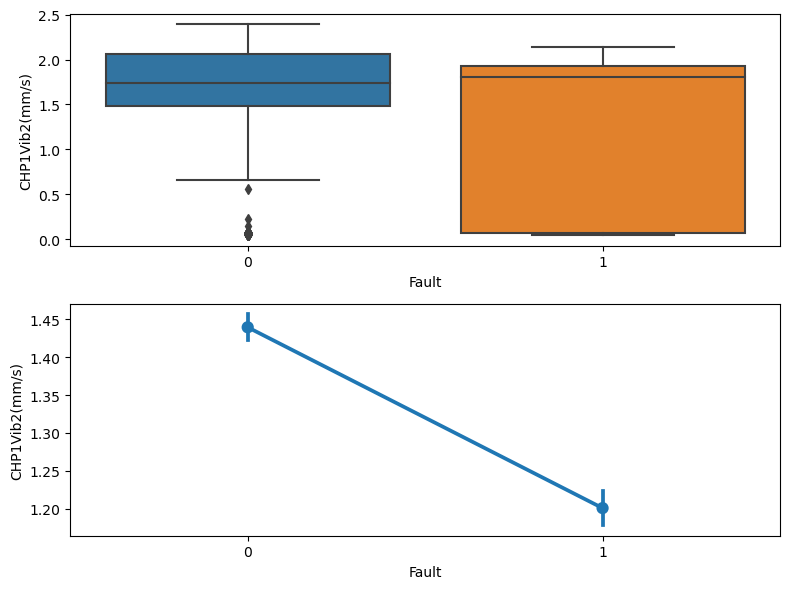


Confidence interval nilai CHP1Vib2(mm/s) untuk faulty pump adalah (1.1772411026015392, 1.2244489051147909)
Confidence interval nilai CHP1Vib2(mm/s) untuk non-faulty pump adalah (1.4220093873296917, 1.4569011438459392)
----------------------------------------------------------------------------------------------------

H0: Mean CHP1Vib2(mm/s) untuk faulty pump = Mean CHP1Vib2(mm/s) untuk non-faulty pump
H1: Mean CHP1Vib2(mm/s) untuk faulty pump != Mean CHP1Vib2(mm/s) untuk non-faulty
Nilai p-value: 1.1058254408843422e-58, tolak H0


7. Fault - CHP2Vib1(mm/s)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


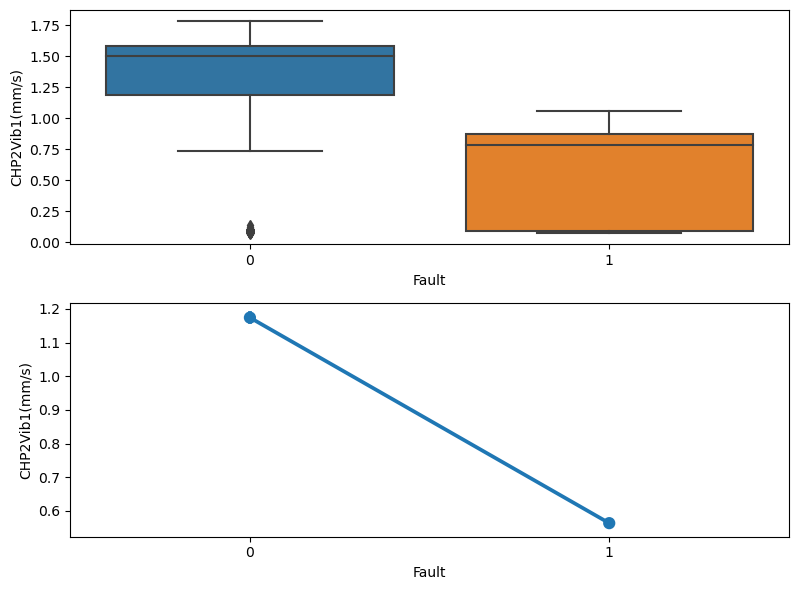


Confidence interval nilai CHP2Vib1(mm/s) untuk faulty pump adalah (0.5535064801522389, 0.5734964568310461)
Confidence interval nilai CHP2Vib1(mm/s) untuk non-faulty pump adalah (1.160613195639786, 1.1874960352026716)
----------------------------------------------------------------------------------------------------

H0: Mean CHP2Vib1(mm/s) untuk faulty pump = Mean CHP2Vib1(mm/s) untuk non-faulty pump
H1: Mean CHP2Vib1(mm/s) untuk faulty pump != Mean CHP2Vib1(mm/s) untuk non-faulty
Nilai p-value: 0.0, tolak H0


8. Fault - CHP2Vib2(mm/s)


/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


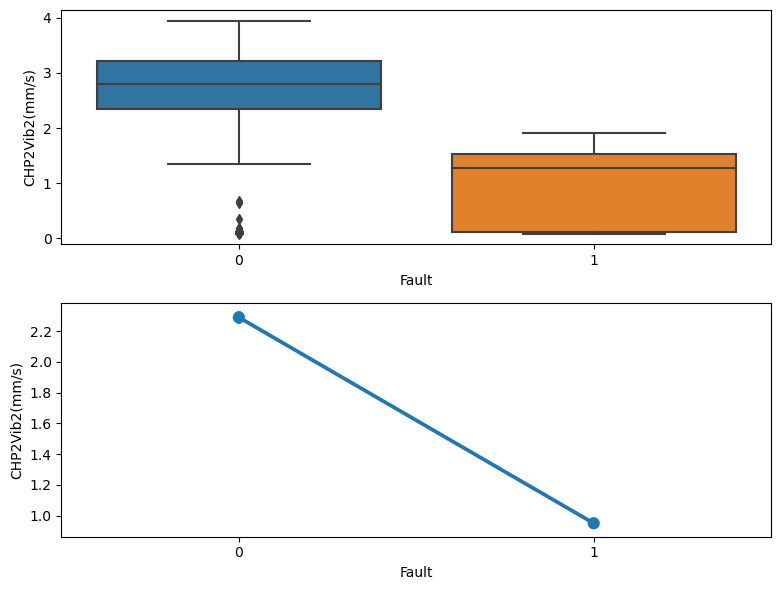


Confidence interval nilai CHP2Vib2(mm/s) untuk faulty pump adalah (0.9331774278067289, 0.9691528698232512)
Confidence interval nilai CHP2Vib2(mm/s) untuk non-faulty pump adalah (2.262409164436862, 2.3173144462247106)
----------------------------------------------------------------------------------------------------

H0: Mean CHP2Vib2(mm/s) untuk faulty pump = Mean CHP2Vib2(mm/s) untuk non-faulty pump
H1: Mean CHP2Vib2(mm/s) untuk faulty pump != Mean CHP2Vib2(mm/s) untuk non-faulty
Nilai p-value: 0.0, tolak H0




/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:14: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_yes = t.interval(alpha=0.95,
/var/folders/t3/cqddr6dn4s596__8jnjm6s700000gn/T/ipykernel_31042/2263528008.py:18: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  ci_no = t.interval(alpha=0.95,


In [14]:
n1 = len(data[data['Fault'] == 1])
n2 = len(data[data['Fault'] == 0])

num = 1
for col in data_numeric.columns:
  print(f"{num}. Fault - {col}")
  fig, ax = plt.subplots(2,1, figsize=(8,6))
  sns.boxplot(data=data, x='Fault', y=col, ax=ax[0])
  sns.pointplot(data=data, x='Fault', y=col, ax=ax[1])
  plt.tight_layout()
  plt.show()
  print()

  ci_yes = t.interval(alpha=0.95,
                      df=n1 - 1,
                      loc = data[data['Fault'] == 1][col].mean(),
                      scale = data[data['Fault'] == 1][col].std()/np.sqrt(n1))
  ci_no = t.interval(alpha=0.95,
                      df=n2 - 1,
                      loc = data[data['Fault'] == 0][col].mean(),
                      scale = data[data['Fault'] == 0][col].std()/np.sqrt(n2))
  print(f"Confidence interval nilai {col} untuk faulty pump adalah {ci_yes}")
  print(f"Confidence interval nilai {col} untuk non-faulty pump adalah {ci_no}")
  print("-"*100)
  print()
  # Independent T-test, alpha - 0.05
  
  print(f"H0: Mean {col} untuk faulty pump = Mean {col} untuk non-faulty pump")
  print(f"H1: Mean {col} untuk faulty pump != Mean {col} untuk non-faulty")
  stat, pvalue = ttest_ind(data[data['Fault'] == 1][col],
                           data[data['Fault'] == 0][col])
  if pvalue < 0.05:
    print(f"Nilai p-value: {pvalue}, tolak H0")
  else:
    print(f"Nilai p-value: {pvalue}, gagal menolak H0")
  print()
  print("="*100)
  print()

  num+=1

<AxesSubplot:xlabel='CHP1Vib1(mm/s)', ylabel='Count'>

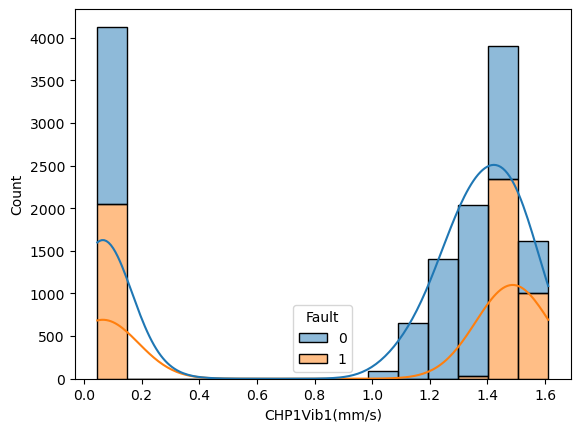

In [15]:
sns.histplot(data=data, x='CHP1Vib1(mm/s)', hue='Fault', kde=True, multiple='stack')

## Insights from Data



1. Temperatur dari CHP1 right skewed, dengan fitur CHP1Temp1 memiliki banyak outlier
2. Temperatur dari CHP2 memiliki distribusi multimodal (punya > 2 modus) baik temperatur 1 dan temperatur 2
3. Vibrasi dari CHP1 memiliki distribusi bimodal (punya 2 modus)
4. Vibrasi dari CHP2 memiliki distribusi multimodal baik vibrasi 1 dan vibrasi 2
5. Berdasarkan visualisasi data, suhu yang lebih rendah biasanya menunjukkan bahwa pump mungkin faulty
6. Getaran yang lebih rendah juga menunjukkan bahwa pumpu mungkin faulty

# Data Preprocessing

In [16]:
x = data.drop(['Timestamp','Fault'], axis=1)
y = data['Fault']

In [17]:
# splitting data, 20% untuk test, dengan stratifikasi pada fitur 'Fault'
X_train, X_test, y_train, y_test = train_test_split(x,  y, test_size=0.2, stratify=y, random_state=42)

### Normalize data with MinMax Scaler

In [18]:
mm = MinMaxScaler()
X_train_transformed = pd.DataFrame(mm.fit_transform(X_train),columns=mm.feature_names_in_)
X_train_transformed.head()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s)
0,0.777934,0.816816,0.661041,0.847376,0.773528,0.830255,0.802703,0.851355
1,0.835588,0.780735,0.614844,0.874402,0.915630,0.698217,0.912311,0.670661
2,0.866986,0.888172,0.690578,0.894879,0.918337,0.745381,0.863285,0.674440
3,0.343878,0.308519,0.474422,0.448019,0.009980,0.006532,0.007769,0.003909
4,0.786670,0.859069,0.683519,0.859391,0.835714,0.899497,0.825966,0.820651


In [19]:
X_test_transformed = pd.DataFrame(mm.fit_transform(X_test),columns=mm.feature_names_in_)
X_test_transformed.head()

,CHP1Temp1(Deg C),CHP1Temp2(Deg C),CHP2Temp1(Deg C),CHP2Temp2(Deg C),CHP1Vib1(mm/s),CHP1Vib2(mm/s),CHP2Vib1(mm/s),CHP2Vib2(mm/s)
0,0.356022,0.281599,0.009181,0.004336,0.013203,0.004583,0.010502,0.005371
1,0.393032,0.307545,0.007766,0.004733,0.014640,0.006513,0.011715,0.007447
2,0.011180,0.012310,0.005177,0.001461,0.005073,0.002946,0.004324,0.001721
3,0.550924,0.603466,0.497047,0.612217,0.767513,0.915496,0.795818,0.817959
4,0.713587,0.510925,0.008795,0.008211,0.008744,0.005541,0.011560,0.005340


# Modeling

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [21]:
def classif(x, y, estimator):
    y_pred = estimator.predict(x)
    print(classification_report(y, y_pred))

In [22]:
tree = DecisionTreeClassifier()
tree.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [23]:
classif(X_train_transformed, y_train, tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6723
           1       1.00      1.00      1.00      4354

    accuracy                           1.00     11077
   macro avg       1.00      1.00      1.00     11077
weighted avg       1.00      1.00      1.00     11077



In [24]:
classif(X_test_transformed, y_test, tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       0.99      1.00      1.00      1089

    accuracy                           1.00      2770
   macro avg       1.00      1.00      1.00      2770
weighted avg       1.00      1.00      1.00      2770



In [25]:
data.columns

Index(['Timestamp', 'CHP1Temp1(Deg C)', 'CHP1Temp2(Deg C)', 'CHP2Temp1(Deg C)',
       'CHP2Temp2(Deg C)', 'CHP1Vib1(mm/s)', 'CHP1Vib2(mm/s)',
       'CHP2Vib1(mm/s)', 'CHP2Vib2(mm/s)', 'Fault'],
      dtype='object')

# Main Function

In [26]:
def main(estimator):
    input_data = {
        'CHP1Temp1(Deg C)': 0, 
        'CHP1Temp2(Deg C)': 0, 
        'CHP2Temp1(Deg C)': 0,
        'CHP2Temp2(Deg C)': 0,
        'CHP1Vib1(mm/s)' : 0,
        'CHP1Vib2(mm/s)': 0,
        'CHP2Vib1(mm/s)': 0,
        'CHP2Vib2(mm/s)': 0
        }
    for key, value in input_data.items():
        input_data[key] = float(input("Masukkan {}".format(key)))

    df = pd.DataFrame(input_data, index=[0])
    mm = MinMaxScaler()
    df_transformed = pd.DataFrame(mm.fit_transform(df),columns=mm.feature_names_in_)
    pred = estimator.predict(df_transformed)
    if pred[0] == 1:
        print("Pump may be faulty")
    else:
        print("Pump is okay")
    print(pred)


In [27]:
# testing data
# input_data = {
#     'CHP1Temp1(Deg C)': 38.2 
#     'CHP1Temp2(Deg C)': 37.7, 
#     'CHP2Temp1(Deg C)': 33.7,
#     'CHP2Temp2(Deg C)': 32,
#     'CHP1Vib1(mm/s)' : 0.9,
#     'CHP1Vib2(mm/s)': 1.17,
#     'CHP2Vib1(mm/s)': 0.58,
#     'CHP2Vib2(mm/s)': 0.943
#     }

main(tree)

Masukkan CHP1Temp1(Deg C)38.2
Masukkan CHP1Temp2(Deg C)37.7
Masukkan CHP2Temp1(Deg C)33.7
Masukkan CHP2Temp2(Deg C)32
Masukkan CHP1Vib1(mm/s)0.9
Masukkan CHP1Vib2(mm/s)1.17
Masukkan CHP2Vib1(mm/s)0.58
Masukkan CHP2Vib2(mm/s)0.943
Pump may be faulty
[1]
